#### Microsoft Research Data License Agreement for Kaggle Cats and Dogs Dataset<br>
This Microsoft Research Data License Agreement (“Agreement”) is a legal agreement between you and Microsoft Corporation (or based on where you live, one of its affiliates). Please read them.  They apply to the Microsoft Research dataset named above, which may include any associated materials, text or speech files, associated media and “online” or electronic documentation and any updates we provide in our discretion (together, the “Dataset”). The terms also apply to any Microsoft (i) updates, (ii) supplements, (iii) internet-based services, and (iv) support services for this Dataset, unless other terms accompany those items. If so, those terms apply.
By agreeing to this Agreement and/or by using the Dataset, you accept these terms. If you do not accept them, do not use the Dataset. If you comply with these terms, you have the rights below.<br><br>
<b>SCOPE OF RIGHTS</b><br>
You may only use the Dataset:<br>
i. for non-commercial or research purposes only. Examples of non-commercial uses are teaching, academic research, public demonstrations and personal experimentation;<br>
ii. for analyzing and testing purposes; and<br>
iii. to publish (or present papers or articles) on your results from using such Dataset, provided that no material portion of the Dataset is included in any such publication or presentation.<br><br>
<b>DISCLAIMER OF WARRANTY</b><br>
The Dataset is licensed `as-is` You bear the risk of using it. Microsoft gives no express warranties, guarantees or conditions. You may have additional consumer rights or statutory guarantees under your local laws which this agreement cannot change. To the extent permitted under your local laws, Microsoft excludes the implied warranties of merchantability, fitness for a particular purpose and non-infringement.

In [47]:
# Helper libraries
import os
import numpy as np
import pandas as pd
import zipfile
import random
import datetime
from packaging import version
import numpy as np
from IPython.display import Image, display
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.image import imread

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
#from plot_keras_history import plot_history

import shap
import os, cv2, re, random

import os
os.chdir("D:\Datasets\Kaggle_Cats_vs_Dogs")
print("Current Directory: ", str(os.getcwd()))

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2
print("Keras version: ", keras.__version__)

Current Directory:  D:\Datasets\Kaggle_Cats_vs_Dogs
This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.3.1
Keras version:  2.4.0


### Mount Google Drive to Colab Environment

In [6]:
#from google.colab import drive
#drive.mount('/content/gdrive')

<div class="alert alert-block alert-success">
    <b>If the URL doesn't work:</b><br>https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765<br>
Dataset = 786.68 MiB 
</div>

### Load Cats vs Dogs Dataset

In [12]:
#!wget --no-check-certificate \
    #"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    #-O "./data/cats-and-dogs.zip"

#local_zip = './data/cats-and-dogs.zip'
#zip_ref   = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('./data')
#zip_ref.close()

In [2]:
print(len(os.listdir('PetImages/Cat/')))
print(len(os.listdir('PetImages/Dog/')))

12501
12501


<div class="alert alert-block alert-warning"><b>Expected Output:</b><br>
12501 images Cat<br>
12501 images Dog</div>

### Preprocessing the Examples

In [22]:
# Preprocessing Code - Run this only once

# try:
#     os.mkdir('cats_v_dogs')
#     os.mkdir('cats_v_dogs/training')
#     os.mkdir('cats_v_dogs/testing')
#     os.mkdir('cats_v_dogs/training/cats')
#     os.mkdir('cats_v_dogs/training/dogs')
#     os.mkdir('cats_v_dogs/testing/cats')
#     os.mkdir('cats_v_dogs/testing/dogs')
# except OSError:
#     pass

# def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
#     files = []
#     for filename in os.listdir(SOURCE):
#         file = SOURCE + filename
#         if os.path.getsize(file) > 0:
#             files.append(filename)
#         else:
#             print(filename + " is zero length, so ignoring.")

#     training_length = int(len(files) * SPLIT_SIZE)
#     testing_length = int(len(files) - training_length)
#     shuffled_set = random.sample(files, len(files))
#     training_set = shuffled_set[0:training_length]
#     testing_set = shuffled_set[-testing_length:]

#     for filename in training_set:
#         this_file = SOURCE + filename
#         destination = TRAINING + filename
#         copyfile(this_file, destination)

#     for filename in testing_set:
#         this_file = SOURCE + filename
#         destination = TESTING + filename
#         copyfile(this_file, destination)


# CAT_SOURCE_DIR = "PetImages/Cat/"
# TRAINING_CATS_DIR = "cats_v_dogs/training/cats/"
# TESTING_CATS_DIR = "cats_v_dogs/testing/cats/"
# DOG_SOURCE_DIR = "PetImages/Dog/"
# TRAINING_DOGS_DIR = "cats_v_dogs/training/dogs/"
# TESTING_DOGS_DIR = "cats_v_dogs/testing/dogs/"

# split_size = .9
# split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
# split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


<div class="alert alert-block alert-warning"><b>Expected Output:</b><br>
666.jpg is zero length, so ignoring<br>
11702.jpg is zero length, so ignoring<br></div>

In [3]:
print(len(os.listdir('cats_v_dogs/training/cats')))
print(len(os.listdir('cats_v_dogs/training/dogs')))
print(len(os.listdir('cats_v_dogs/testing/cats')))
print(len(os.listdir('cats_v_dogs/testing/dogs')))

11250
11250
1250
1250


<b>Expected output:</b><br>
11250 - Training Cats<br>
11250 - Training Dogs<br>
1250 - Test Cats<br>
1250 - Test Dogs<br>

## Review Images

### Cat Images

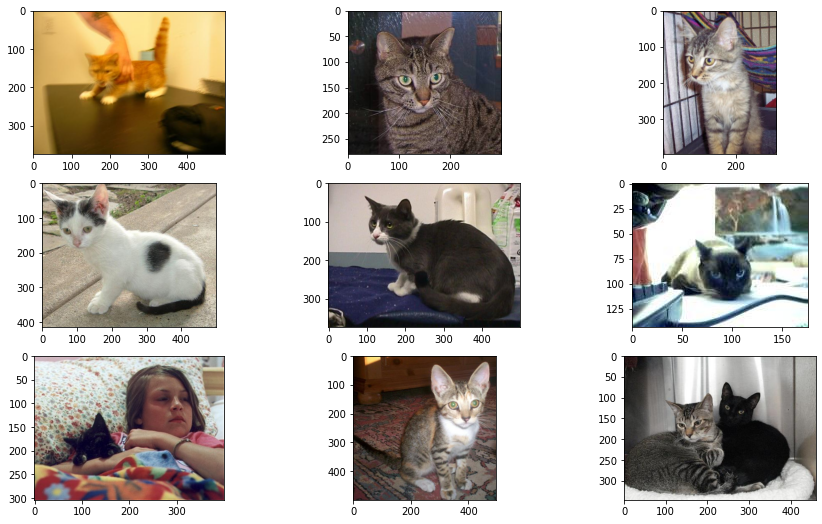

In [4]:
def plot_sample_cats(Catfolder = 'PetImages/Cat/'):
    fig = plt.figure(figsize = (15, 9))
    for i in range(9):
    # define subplot
        pyplot.subplot(330 + 1 + i)
    # define filename
        filename = Catfolder + str(i) + '.jpg'
    # load image pixels
        image = imread(filename)
    # plot raw pixel data
        pyplot.imshow(image)
    # show the figure
    pyplot.show()
    return

plot_sample_cats()

### Dog Images

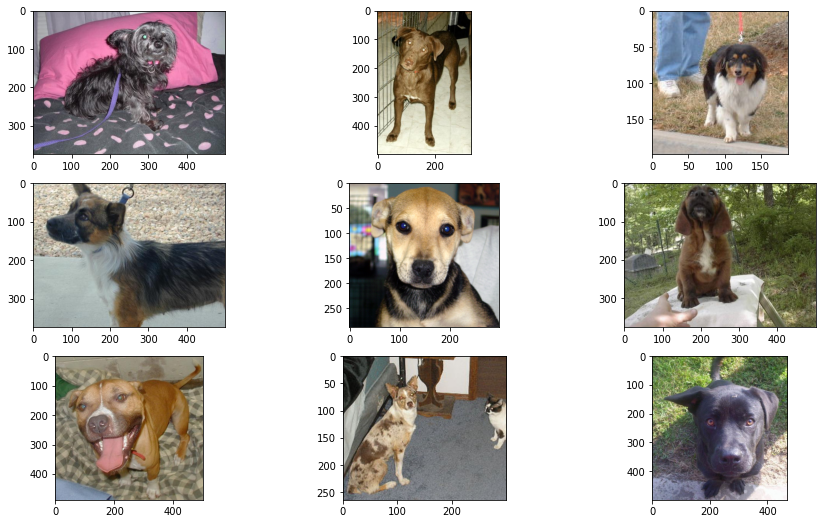

In [5]:
def plot_sample_dogs(Dogfolder = 'PetImages/Dog/'):
    fig = plt.figure(figsize = (15, 9))
    for i in range(9):
    # define subplot
        pyplot.subplot(330 + 1 + i)
    # define filename
        filename = Dogfolder + str(i) + '.jpg'
    # load image pixels
        image = imread(filename)
    # plot raw pixel data
        pyplot.imshow(image)
    # show the figure
    pyplot.show()
    return

plot_sample_dogs()

### Image Generator

<div class="alert alert-block alert-info">
<b>tf.keras.preprocessing.image.ImageDataGenerator</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator</div><br>
A DataFrame Iterator yielding tuples of (x, y) where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels. 

In [7]:
TRAINING_DIR = "cats_v_dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "cats_v_dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


### Build CNN Models

The model that was given here will be labeled as Convolutional Network 1.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)       

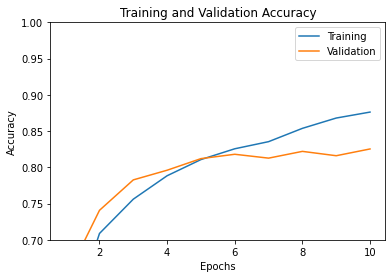

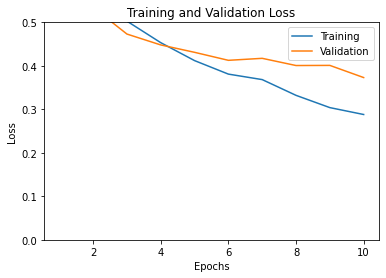

In [54]:
def cnn_model_1(train_generator, validation_generator):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(448, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    history = model.fit(train_generator, epochs=10
                        ,validation_data=validation_generator
                        ,validation_steps=6
                        #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
                       )
    
    history_dict = history.history
    history_dict.keys()
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
    plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
    plt.ylim([0.7, 1.0])
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
    plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
    plt.ylim([0.0, 0.5])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    predictions = model.predict(validation_generator, validation_generator)
    
    return model, history, predictions

model_1, history_1, predictions_1 = cnn_model_1(train_generator, validation_generator)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 32)       

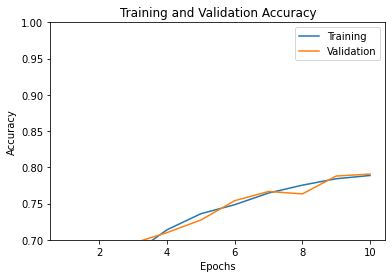

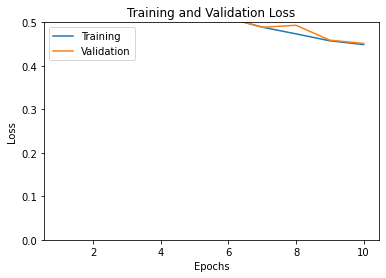

In [55]:
def cnn_model_2(train_generator, validation_generator):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(224, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    history = model.fit(train_generator, epochs=10
                        ,validation_data=validation_generator
                        ,validation_steps=6
                        #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
                       )
    
    history_dict = history.history
    history_dict.keys()
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
    plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
    plt.ylim([0.7, 1.0])
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
    plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
    plt.ylim([0.0, 0.5])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    predictions = model.predict(validation_generator, validation_generator)
    
    return model, history, predictions

model_2, history_2, predictions_2 = cnn_model_2(train_generator, validation_generator)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)      

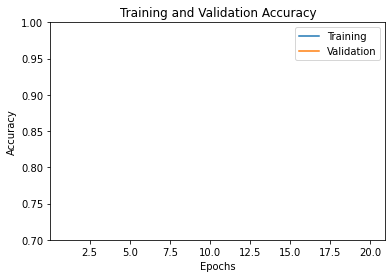

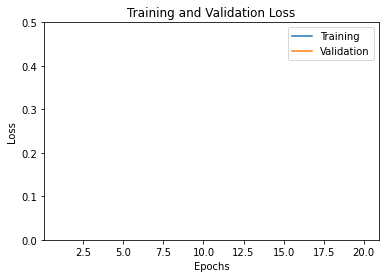

In [56]:
def cnn_model_3(train_generator, validation_generator):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(896, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.summary()

    model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['acc'])

    history = model.fit(train_generator, epochs=20
                        ,validation_data=validation_generator
                        ,validation_steps=6
                        #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
                       )
    
    history_dict = history.history
    history_dict.keys()
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
    plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
    plt.ylim([0.7, 1.0])
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
    plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
    plt.ylim([0.0, 0.5])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    predictions = model.predict(validation_generator, validation_generator)
    
    return model, history, predictions

model_3, history_3, predictions_3 = cnn_model_3(train_generator, validation_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0

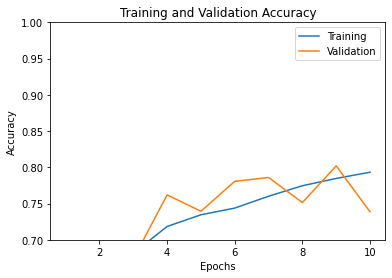

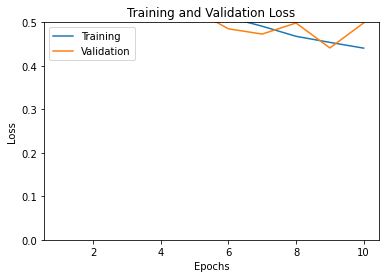

In [8]:
def cnn_model_4(train_generator, validation_generator):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(224, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

    history = model.fit(train_generator, epochs=10
                        ,validation_data=validation_generator
                        ,validation_steps=6
                        #,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2)]
                       )
    
    history_dict = history.history
    history_dict.keys()
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.plot(range(1, len(acc) + 1), history.history['acc'], label = 'Training')
    plt.plot(range(1, len(val_acc) + 1), history.history['val_acc'], label = 'Validation')
    plt.ylim([0.7, 1.0])
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(range(1, len(loss) + 1), history.history['loss'], label = 'Training')
    plt.plot(range(1, len(val_loss) + 1), history.history['val_loss'], label = 'Validation')
    plt.ylim([0.0, 0.5])
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    predictions = model.predict(validation_generator, validation_generator)
    
    return model, history, predictions

model_4, history_4, predictions_4 = cnn_model_4(train_generator, validation_generator)

### Interpretability

In [79]:
X_train, y_train = next(train_generator)
X_test, y_test = next(validation_generator)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


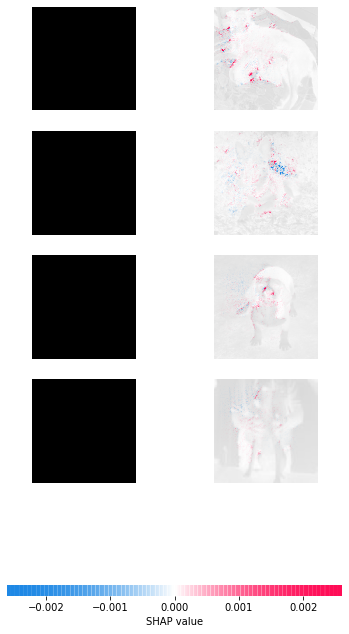

None

In [12]:
def shap_deep_explainer(model, X_train, X_test, n_samples):
    explainer = shap.DeepExplainer(model, X_train)
    shap_values = explainer.shap_values(X_test[1:n_samples])
    display(shap.image_plot(shap_values, -X_test[1:n_samples]))
    return

shap_deep_explainer(model_4, X_train, X_test, n_samples=5)

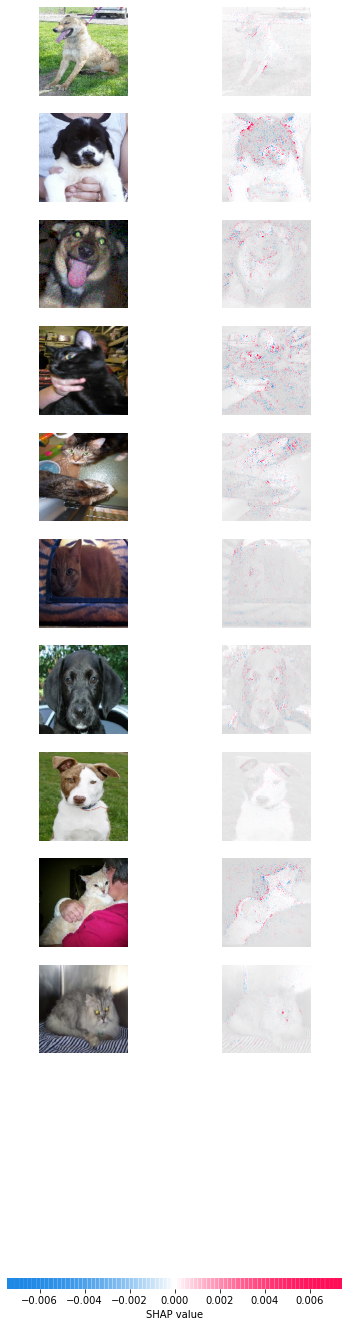

None

In [80]:
def shap_gradient_explainer(model, X_train, X_test, n_samples):
    explainer = shap.GradientExplainer(model, X_train)
    shap_values = explainer.shap_values(X_test[:n_samples])
    display(shap.image_plot(shap_values, X_test[:n_samples]))
    return

shap_gradient_explainer(model_1, X_train, X_test, n_samples=10)

### Kaggle Submissions

In [36]:
def prepare_data(list_of_images, img_width = 150, img_height = 150):
    x = []
    y = [] 
    
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(image), (img_width,img_height), interpolation=cv2.INTER_CUBIC))
    
    for i in list_of_images:
        if 'dog' in i:
            y.append(1)
        elif 'cat' in i:
            y.append(0)            
    return x, y

In [38]:
test_directory = 'D:/Datasets/Kaggle_Cats_vs_Dogs/Kaggle_Submission_Data/'
test_images =  [test_directory+i for i in os.listdir(test_directory)]
X_test, Y_test = prepare_data(test_images)

In [39]:
test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator = validation_datagen.flow(np.array(X_test), batch_size=16)

In [44]:
predictions = (model_4.predict(test_generator, test_generator) > 0.5).astype("int32")
predictions.shape
predictions

(12500, 1)

array([[0],
       [1],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [68]:
def generate_kaggle_predictions(model, test_directory = 'D:/Datasets/Kaggle_Cats_vs_Dogs/Kaggle_Submission_Data/',
                               validation_datagen = validation_datagen):
    test_images =  [test_directory+i for i in os.listdir(test_directory)]
    X_test, Y_test = prepare_data(test_images)
    test_datagen = ImageDataGenerator(rescale=1.0/255.)
    test_generator = test_datagen.flow(np.array(X_test), batch_size=16)
    predictions = model.predict(test_generator, test_generator)
    model_predictions = pd.DataFrame({'id': range(1, len(test_images) + 1), 'Label': list(predictions)})
    model_predictions['Label'] = model_predictions['Label'].map(lambda x: str(x).lstrip('[').rstrip(']'))
    return model_predictions

In [69]:
model_1_predictions = generate_kaggle_predictions(model_1)

In [70]:
model_1_predictions.head(10)

,id,Label
0,1,0.008
1,2,0.299
2,3,0.873
3,4,0.081
4,5,0.107
5,6,0.813
6,7,0.082
7,8,0.978
8,9,0.846
9,10,0.901


In [71]:
model_2_predictions = generate_kaggle_predictions(model_2)

In [72]:
model_3_predictions = generate_kaggle_predictions(model_3)

In [73]:
model_4_predictions = generate_kaggle_predictions(model_4)

In [74]:
model_4_predictions.head(10)

,id,Label
0,1,0.207
1,2,0.503
2,3,0.688
3,4,0.278
4,5,0.233
5,6,0.227
6,7,0.764
7,8,0.381
8,9,0.424
9,10,0.175


In [75]:
model_1_predictions.to_csv("Model 1 CNN Predictions.csv")
model_2_predictions.to_csv("Model 2 CNN Predictions.csv")
model_3_predictions.to_csv("Model 3 CNN Predictions.csv")
model_4_predictions.to_csv("Model 4 CNN Predictions.csv")